In [1]:
import pickle
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

import doja
from example import *

In [2]:
# Load the checkpoint.
with open("ckpt.pkl", "rb") as f:
    model = pickle.load(f)

In [6]:
# Pick 20 random images from the validation set.
dataset = load_dataset("mnist").with_format('numpy')['test'].shuffle().select(range(20))
images, labels = format_dataset(dataset)

In [3]:
# Run the model on the images.
logits = model(doja.tensor(images))

# Get the probabilities and predictions.
probs = doja.softmax(logits).data
preds = np.argmax(logits.data, axis=-1)

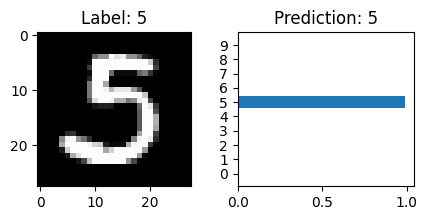

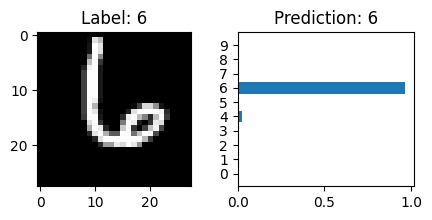

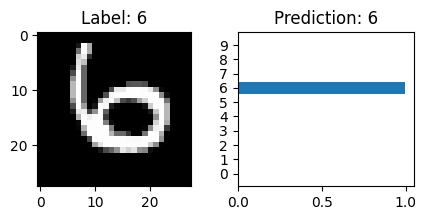

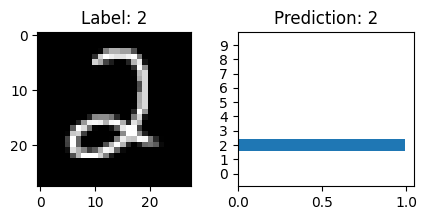

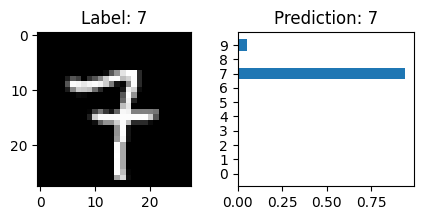

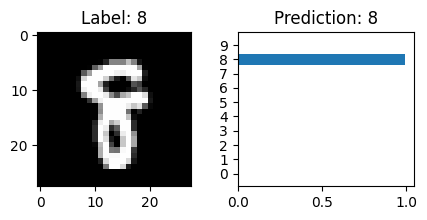

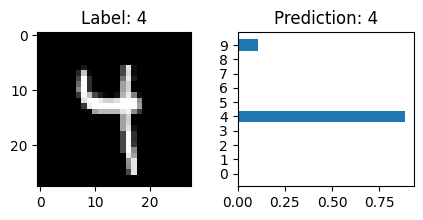

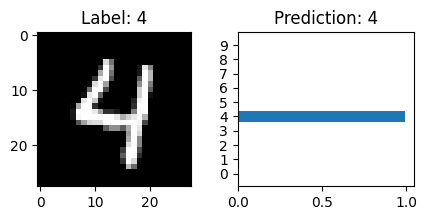

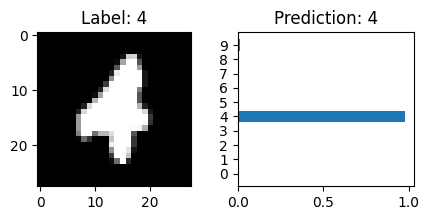

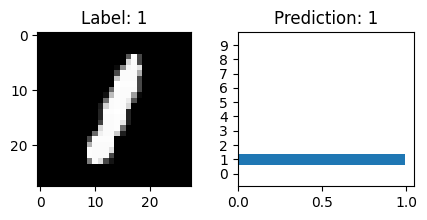

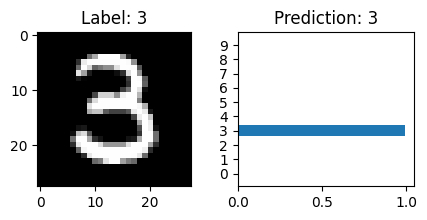

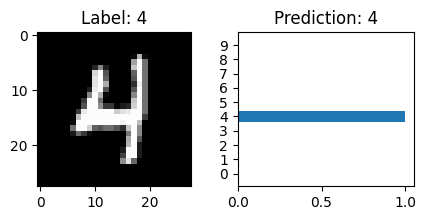

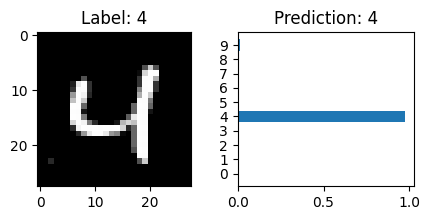

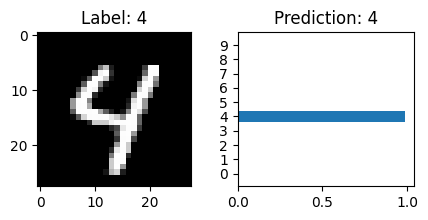

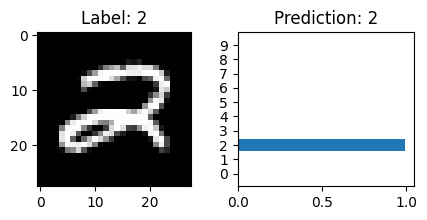

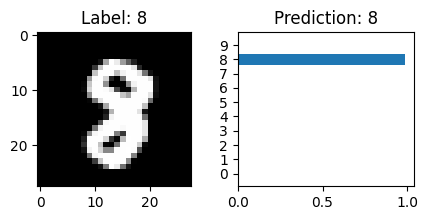

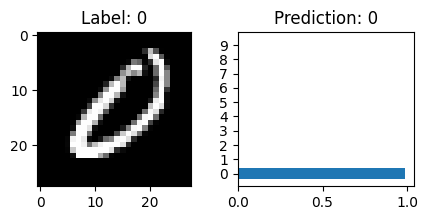

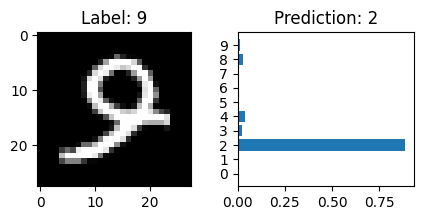

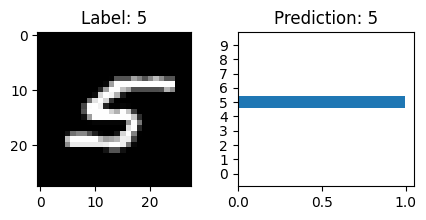

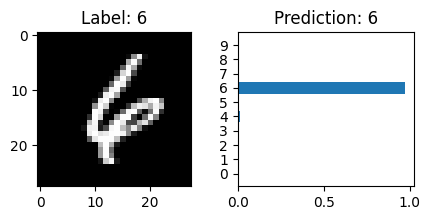

In [4]:
for i in range(len(dataset)):
    plt.figure(figsize=(5, 2))

    plt.subplot(1, 2, 1)
    plt.imshow(dataset[i]['image'], cmap='grey')
    plt.title(f"Label: {dataset[i]['label']}")

    plt.subplot(1, 2, 2)
    plt.barh(np.arange(10), probs[i])
    plt.yticks(np.arange(10), labels=np.arange(10))
    plt.title(f"Prediction: {preds[i]}")
    plt.show()